# Daten einlesen

In [1]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df['class']=iris.target_names[iris.target ]
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df = iris_df[50:]



# Werte für Decision Tree ausrechnen

In [11]:
filter_crit = (iris_df["petal_wid"] > 1.75)
filter_ver  = (iris_df["class"] == "versicolor")
filter_vir  = (iris_df["class"] == "virginica")

print( "Total      : ", iris_df[ filter_crit]["class"].count() )
print( "Versicolor : ", iris_df[ filter_crit & filter_ver]["class"].count() )
print( "Virginica  : ", iris_df[ filter_crit & filter_vir]["class"].count() )

Total      :  46
Versicolor :  1
Virginica  :  45


# Berechnung des optimalen Baumes mit Python


Shape of Feature Matrix : (100, 4)

Shape of Labels : (100,)


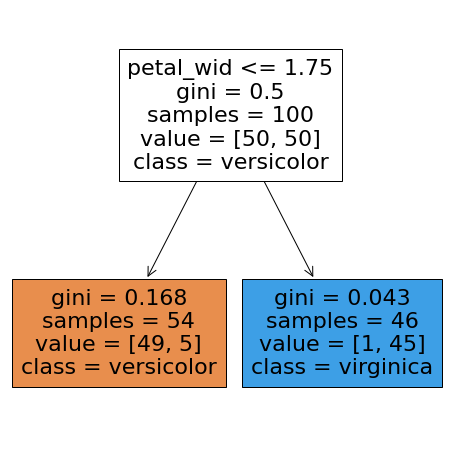

In [9]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df['class']=iris.target_names[iris.target ]
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df = iris_df[50:]


X = iris_df.sample(frac=1).reset_index(drop=True)
y = X['class']
X = X.drop(['class'], axis=1)

print(f'\nShape of Feature Matrix : {X.shape}')
print(f'\nShape of Labels : {y.shape}')

clf = DecisionTreeClassifier(random_state=1234, criterion = 'gini', max_depth=1)
model = clf.fit(X, y)

fig = plt.figure(figsize=(8,8))
p = tree.plot_tree(clf
                   , feature_names=X.columns
                   , class_names=['versicolor', 'virginica']
                   , filled=True
                   )

# Optimaler Baum der Höhe 2 für alle Daten


Shape of Feature Matrix : (150, 4)

Shape of Labels : (150,)


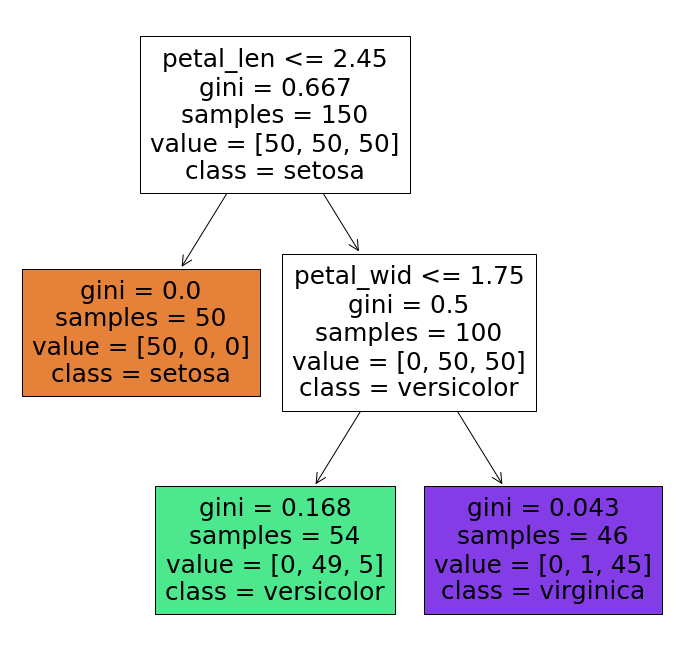

In [16]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df['class']=iris.target_names[iris.target ]
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']


X = iris_df.sample(frac=1).reset_index(drop=True)
y = X['class']
X = X.drop(['class'], axis=1)

print(f'\nShape of Feature Matrix : {X.shape}')
print(f'\nShape of Labels : {y.shape}')

clf = DecisionTreeClassifier(random_state=1234, criterion = 'gini', max_depth=2)
model = clf.fit(X, y)

fig = plt.figure(figsize=(12,12))
p = tree.plot_tree(clf
                   , feature_names=X.columns
                   , class_names=['setosa', 'versicolor', 'virginica']
                   , filled=True
                   )

# Training mit Testdaten

   sepal_len  sepal_wid  petal_len  petal_wid
0        6.9        3.2        5.7        2.3
1        5.2        3.4        1.4        0.2
2        6.0        2.2        5.0        1.5
3        4.8        3.1        1.6        0.2
4        6.9        3.1        4.9        1.5

Shape of Training-Data : (145, 4)

Shape of Test-Data     : (5, 4)
Accuracy-Training :  0.9724137931034482
Accuracy-Testing  :  1.0
Creating Tree ... 


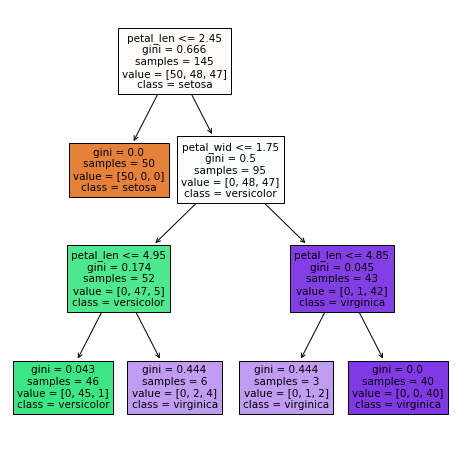

In [24]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

X = iris_df.sample(frac=1).reset_index(drop=True)

TRAIN_SPLIT = 145
X_train = X[0:TRAIN_SPLIT]
y_train = X_train['class']
X_train = X_train.drop(['class'], axis=1)
print( X_train.head())

X_test = X[TRAIN_SPLIT:]
y_test = X_test['class']
X_test = X_test.drop(['class'], axis=1)

print(f'\nShape of Training-Data : {X_train.shape}')
print(f'\nShape of Test-Data     : {X_test.shape}')

clf = DecisionTreeClassifier(random_state=1234, criterion = 'gini', max_depth=3)
model = clf.fit(X_train, y_train)

print("Accuracy-Training : ", clf.score(X_train, y_train))
print("Accuracy-Testing  : ", clf.score(X_test, y_test))

print("Creating Tree ... ")
fig = plt.figure(figsize=(8,8))
p = tree.plot_tree(clf
                   , feature_names=X.columns
                   , class_names=['setosa', 'versicolor', 'virginica']
                   , filled=True
                   )